In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Project1_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum().any()

False

In [5]:
df.drop('id', axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


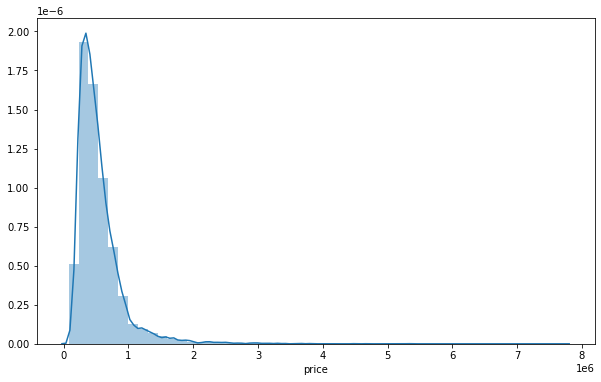

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df.price);

# FEATURE ENGINEERING

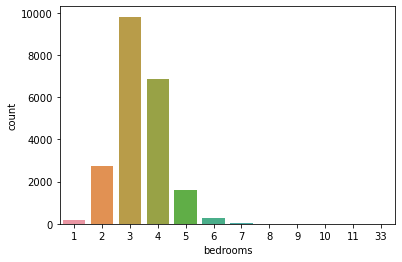

In [7]:
sns.countplot(df.bedrooms);

In [8]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

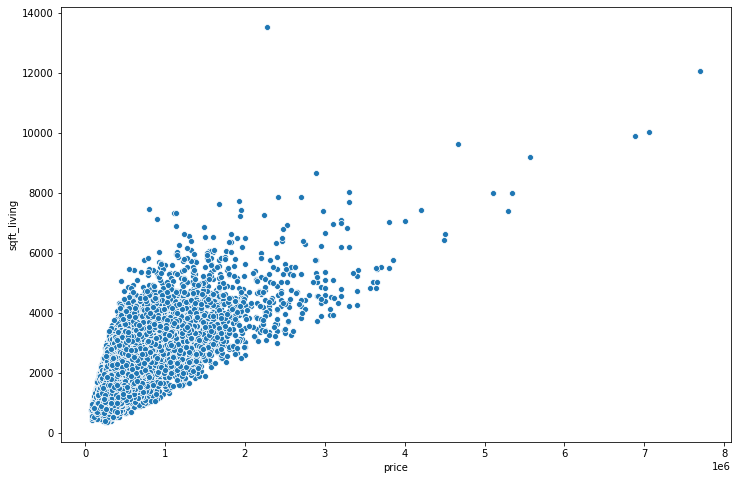

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df);

In [10]:
df[df.bedrooms>8][['price', 'bedrooms', 'sqft_living']]

,price,bedrooms,sqft_living
4092,599999.0,9,3830
4231,700000.0,9,3680
6073,1280000.0,9,3650
8537,450000.0,9,4050
8748,520000.0,11,3000
13301,1150000.0,10,4590
15147,650000.0,10,3610
15856,640000.0,33,1620
16830,1400000.0,9,4620
18428,934000.0,9,2820


In [11]:
# Here we see that 33 bedrooms is a typo. It should be 3
df.groupby('bedrooms')['sqft_living'].mean()

bedrooms
1      888.153061
2     1239.752899
3     1805.837235
4     2554.649666
5     3047.545284
6     3284.341912
7     3974.210526
8     3800.000000
9     3775.000000
10    3706.666667
11    3000.000000
33    1620.000000
Name: sqft_living, dtype: float64

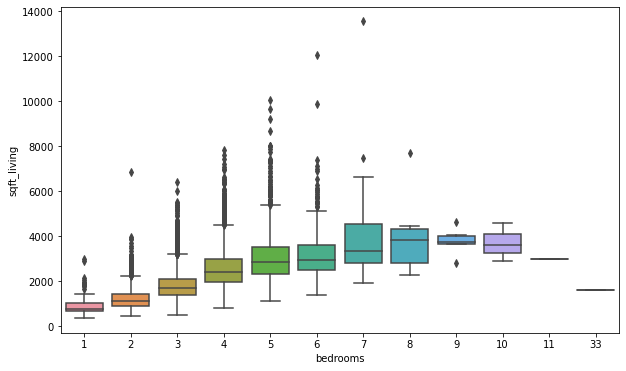

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='sqft_living', data=df);

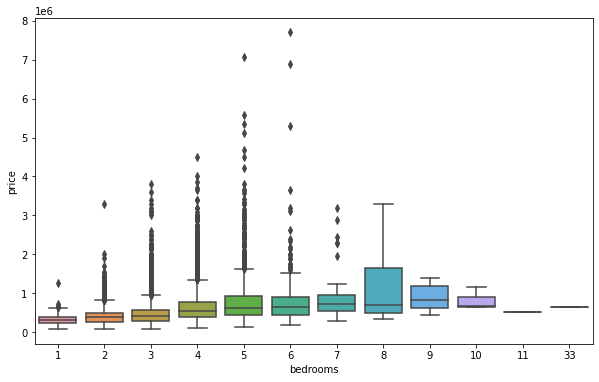

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df);

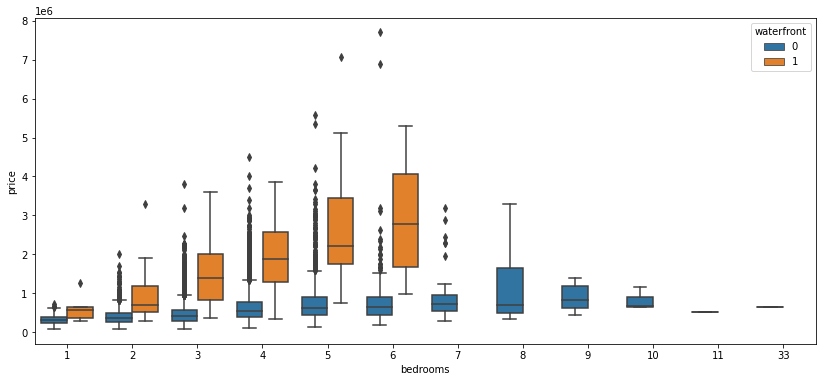

In [14]:
plt.figure(figsize=(14,6))
sns.boxplot(x='bedrooms', y='price', data=df, hue='waterfront');

In [15]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

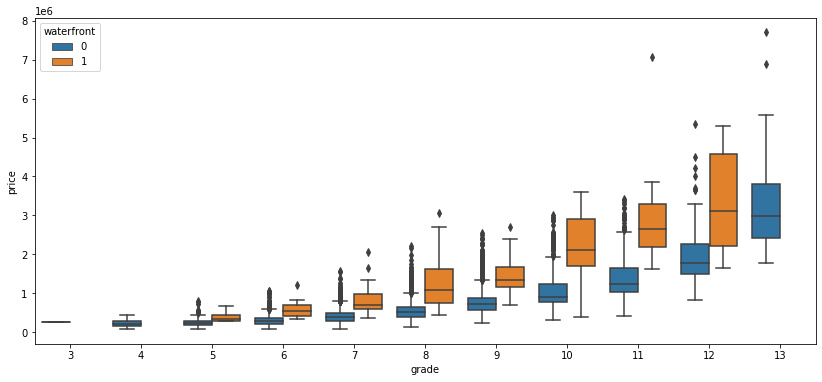

In [16]:
plt.figure(figsize=(14,6))
sns.boxplot(x='grade', y='price', data=df, hue='waterfront');

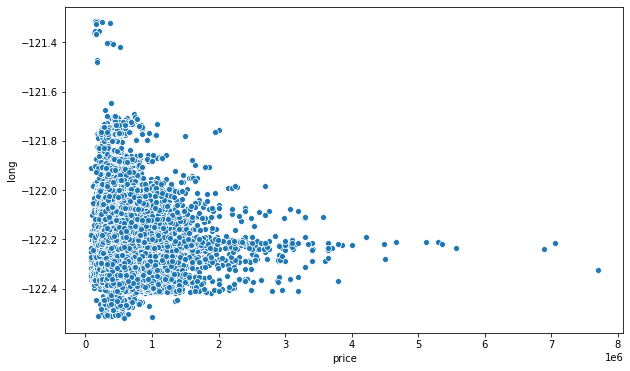

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='long', data=df);

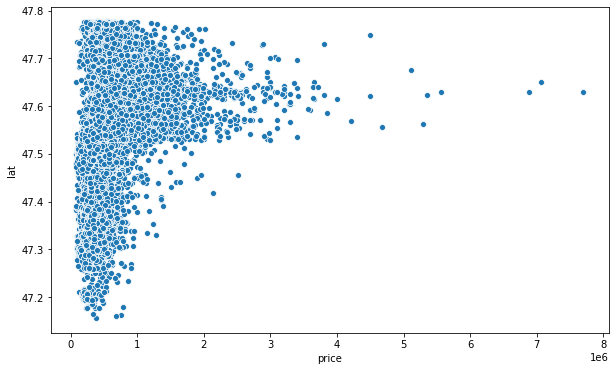

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='lat', data=df);

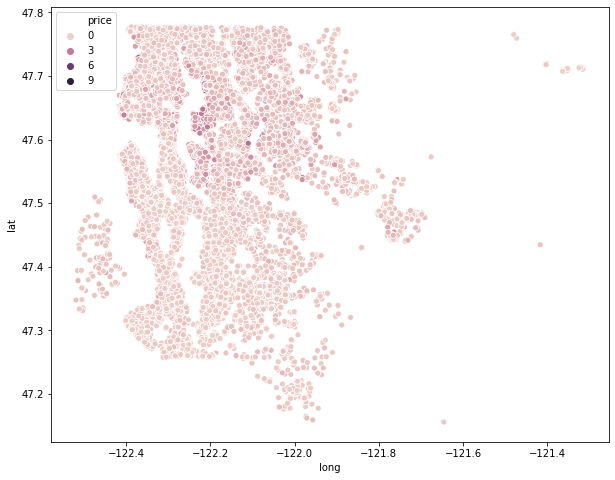

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price');

In [129]:
df.sort_values('price',ascending=False).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,zip,age,basement,renov
7245,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,...,47.6298,-122.323,3940,8800,2014,10,1,108,2,1
3910,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,...,47.6500,-122.214,3930,25449,2014,6,2,78,2,1
9245,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,...,47.6305,-122.240,4540,42730,2014,9,2,17,2,0
4407,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,...,47.6289,-122.233,3560,24345,2014,8,2,17,2,0
1446,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,...,47.6232,-122.220,4600,21750,2015,4,2,9,2,0


In [21]:
non_top_99= df.sort_values('price',ascending=False).iloc[216:]

In [22]:
non_top_99

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


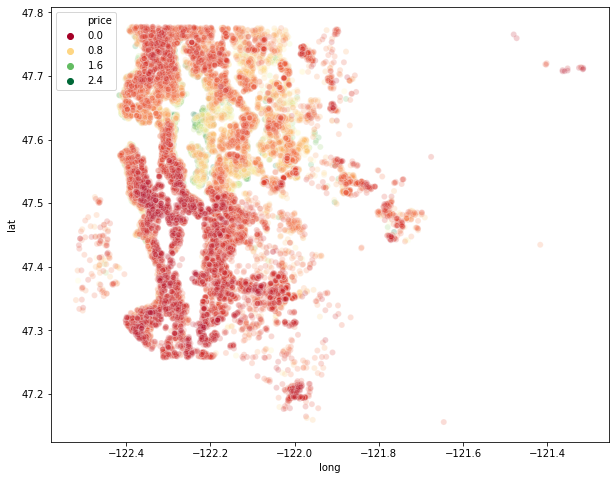

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long', y='lat', data=non_top_99, hue='price', palette='RdYlGn', alpha=0.2);

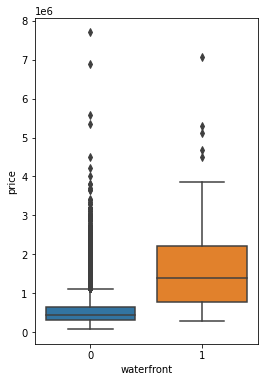

In [24]:
plt.figure(figsize=(4,6))
sns.boxplot(x='waterfront', y='price', data=df);

In [25]:
df=df.drop('id', axis=1)

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
df.date=pd.to_datetime(df.date)

In [28]:
df['year']=df.date.apply(lambda date: date.year)
df['month']=df.date.apply(lambda date: date.month)

In [29]:
df.month.value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

In [30]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


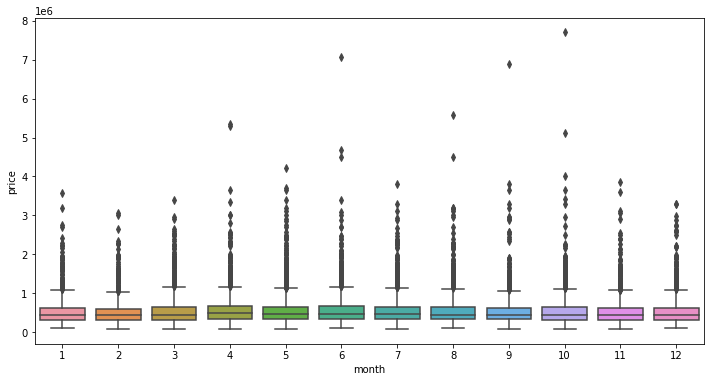

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='price', data=df)

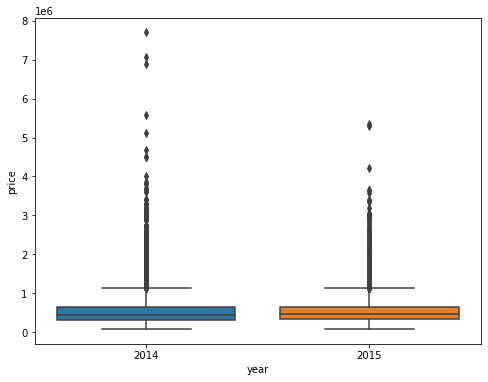

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(x='year', y='price', data=df);

In [33]:
df=df.drop('date', axis=1)

In [34]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


## ZIPCODE

In [35]:
df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head()

zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    8.996077e+05
Name: price, dtype: float64

In [36]:
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [37]:
df.groupby('zipcode')['price'].mean().sort_values(ascending=False)

zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    8.996077e+05
             ...     
98148    2.849086e+05
98001    2.811949e+05
98032    2.512962e+05
98168    2.403284e+05
98002    2.342840e+05
Name: price, Length: 70, dtype: float64

In [38]:
def cls(x):
    if df[df.zipcode==x].price.mean()>=1e+06:
        return 2
    elif df[df.zipcode==x].price.mean()>360000:
        return 1
    else:
        return 0

In [39]:
df['zip'] = df.zipcode.apply(cls)

In [40]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,zip
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,1


In [41]:
df.groupby('zip').price.mean()

zip
0    3.056848e+05
1    5.838394e+05
2    1.274429e+06
Name: price, dtype: float64

In [42]:
df=df.drop('zipcode', axis=1)

In [43]:
df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [44]:
df.groupby('condition').price.mean()

condition
1    341067.241379
2    328178.758824
3    542173.057347
4    521374.450414
5    612577.742504
Name: price, dtype: float64

In [45]:
df.view.value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [46]:
df.groupby('view').price.mean()

view
0    4.967396e+05
1    8.125186e+05
2    7.928560e+05
3    9.724684e+05
4    1.464363e+06
Name: price, dtype: float64

In [47]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [48]:
df.groupby('grade').price.mean()

grade
3     2.620000e+05
4     2.120019e+05
5     2.485240e+05
6     3.019166e+05
7     4.025946e+05
8     5.429868e+05
9     7.737382e+05
10    1.072347e+06
11    1.497792e+06
12    2.202528e+06
13    3.710769e+06
Name: price, dtype: float64

## YR_BUILT --> age

In [50]:
df.yr_built.value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [51]:
df['age']=2018-df.yr_built

In [55]:
df=df.drop('yr_built', axis=1)

In [57]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year', 'month', 'zip', 'age'],
      dtype='object')

## sqft_basement --> basement

In [78]:
df.sqft_basement.sort_values(ascending=False).head(30)

8085     4820
12764    4130
15468    3500
7245     3480
10074    3260
4407     3000
5044     2850
21328    2810
7028     2730
6622     2720
3018     2620
15035    2610
2711     2600
2123     2590
11817    2580
2086     2570
19200    2550
14542    2550
2234     2500
2442     2490
4020     2400
1313     2390
3910     2360
2397     2350
7839     2330
7838     2330
20444    2310
14845    2300
13390    2250
13515    2240
Name: sqft_basement, dtype: int64

In [81]:
df.sqft_basement.sort_values(ascending=False).iloc[5000:5030]

2185     600
98       600
17148    600
6875     600
9403     600
8147     600
730      600
674      600
12167    600
6790     600
11852    600
9199     600
11217    600
18027    600
7043     600
13599    600
1188     600
12869    600
10588    600
7613     600
6205     600
2832     600
2278     600
19067    600
8819     600
142      600
7033     600
20831    600
12315    600
352      600
Name: sqft_basement, dtype: int64

In [72]:
df.sqft_basement.value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [73]:
df.sqft_basement.describe()

count    21597.000000
mean       291.725008
std        442.667800
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [82]:
df.sqft_basement.mean()

291.72500810297726

In [83]:
df[df.sqft_basement!=0].sqft_basement.mean()

742.3571344409096

In [84]:
df[df.sqft_basement!=0].sqft_basement.describe()

count    8487.000000
mean      742.357134
std       405.111631
min        10.000000
25%       450.000000
50%       700.000000
75%       980.000000
max      4820.000000
Name: sqft_basement, dtype: float64

In [87]:
df['basement']=df.sqft_basement.apply(lambda x: 2 if x>1000 else 0 if x==0 else 1)

In [88]:
df.basement.value_counts()

0    13110
1     6621
2     1866
Name: basement, dtype: int64

In [90]:
df=df.drop('sqft_basement', axis=1)

In [94]:
df.sqft_living15.value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [95]:
df.sqft_living15.corr(df.price)

0.5852412017040657

In [96]:
df.sqft_living15.corr(df.sqft_living)

0.7564015282474998

In [98]:
df.corr().price.sort_values()

age             -0.053953
month           -0.009928
year             0.003727
long             0.022036
condition        0.036056
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
basement         0.258190
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
view             0.397370
zip              0.498323
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [99]:
df.sqft_lot.corr(df.sqft_lot15)

0.7182040308060949

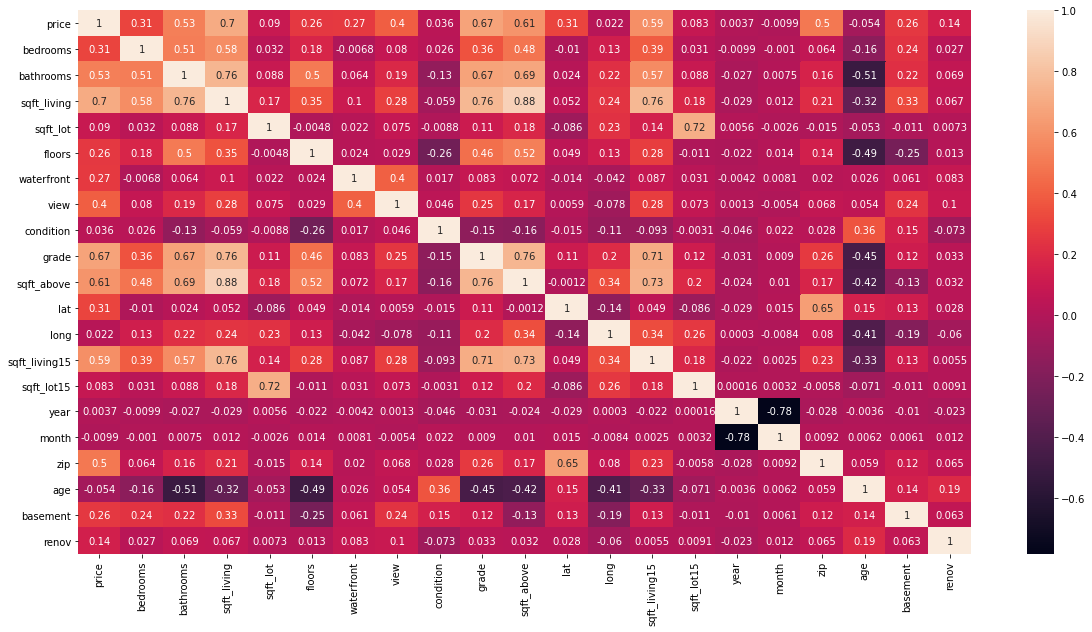

In [190]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

## yr_renovated --> renov

In [104]:
df.yr_renovated.mean()

84.4647867759411

In [105]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [106]:
df[df.yr_renovated!=0].yr_renovated.describe()

count     914.000000
mean     1995.827133
std        15.517107
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.000000
max      2015.000000
Name: yr_renovated, dtype: float64

In [107]:
df['renov']=df.yr_renovated.apply(lambda x: 1 if x>1980 else 0)

In [109]:
df.renov.value_counts()

0    20816
1      781
Name: renov, dtype: int64

In [111]:
df=df.drop('yr_renovated', axis=1)

In [112]:
df.shape

(21597, 21)

In [113]:
X=df.drop('price', axis=1).values
y=df.price.values

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(15117, 20)
(6480, 20)


In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [116]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [117]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=64,epochs=400)

Epoch 1/400
237/237 [==============================] - 1s 3ms/step - loss: 435103487363.2269 - val_loss: 413694328832.0000
Epoch 2/400
237/237 [==============================] - 0s 1ms/step - loss: 413869143909.1093 - val_loss: 231404060672.0000
Epoch 3/400
237/237 [==============================] - 0s 1ms/step - loss: 155416098282.4874 - val_loss: 88163803136.0000
Epoch 4/400
237/237 [==============================] - 0s 1ms/step - loss: 90308863122.2857 - val_loss: 84787634176.0000
Epoch 5/400
237/237 [==============================] - 0s 2ms/step - loss: 96621560014.5210 - val_loss: 81286602752.0000
Epoch 6/400
237/237 [==============================] - 0s 1ms/step - loss: 80881643072.5378 - val_loss: 77700816896.0000
Epoch 7/400
237/237 [==============================] - 0s 1ms/step - loss: 70667932715.0252 - val_loss: 74137124864.0000
Epoch 8/400
237/237 [==============================] - 0s 1ms/step - loss: 77045033183.7311 - val_loss: 70118326272.0000
Epoch 9/400
237/237 [======

In [118]:
losses = pd.DataFrame(model.history.history)

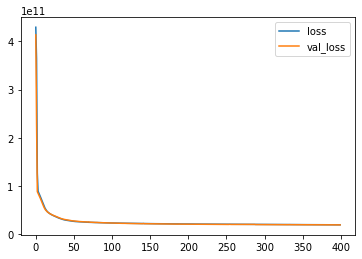

In [119]:
losses.plot();

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [121]:
pred= model.predict(X_test)

In [122]:
mean_squared_error(y_test, pred)

19240531953.485

In [128]:
# mean_squared_error(y_test, pred)

20179847611.58881

In [123]:
mean_absolute_error(y_test, pred)

85924.02617428626

In [129]:
# mean_absolute_error(y_test, pred)

88049.01787229939

In [124]:
explained_variance_score(y_test, pred)

0.8551867351225755

In [131]:
# explained_variance_score(y_test, pred)

0.8478355066519896

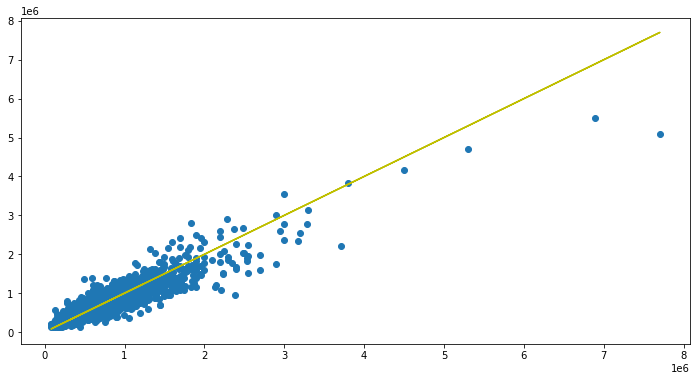

In [125]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, pred)
plt.plot(y_test, y_test, 'y');

In [126]:
single_house=df.drop('price', axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 20))

In [127]:
X_train.shape

(15117, 20)

In [128]:
model.predict(single_house)

array([[240335.67]], dtype=float32)

In [140]:
# model.predict(single_house)

array([[245571.92]], dtype=float32)

In [141]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,zip
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,1


In [140]:
# df_err=pd.concat([df1, df2], axis=1)
df_err=pd.concat([pd.DataFrame(y_test.reshape(6480, 1)), pd.DataFrame(pred)], axis=1)

In [142]:
df_err.columns=['real', 'pred']

In [155]:
df_err['diff_abs']=abs(df_err.real-df_err.pred)

In [156]:
df_err.describe()

,real,pred,diff,diff_abs
count,6.480000e+03,6.480000e+03,6.480000e+03,6.480000e+03
mean,5.351392e+05,5.291464e+05,5.993002e+03,8.592403e+04
std,3.641935e+05,3.248692e+05,1.385914e+05,1.089010e+05
min,8.000000e+04,1.196879e+05,-9.639002e+05,1.140625e+01
25%,3.200000e+05,3.340326e+05,-5.666830e+04,2.382525e+04
50%,4.495000e+05,4.538814e+05,-1.309578e+03,5.557517e+04
75%,6.353075e+05,6.173798e+05,5.462921e+04,1.095021e+05
max,7.700000e+06,5.504738e+06,2.616700e+06,2.616700e+06


In [158]:
df_err[df_err['diff']>2616000].real

6370    7700000.0
Name: real, dtype: float64

In [160]:
df[df.price==7700000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,zip,age,basement,renov
7245,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,...,47.6298,-122.323,3940,8800,2014,10,1,108,2,1


In [131]:
errors = y_test.reshape(6480, 1) - pred

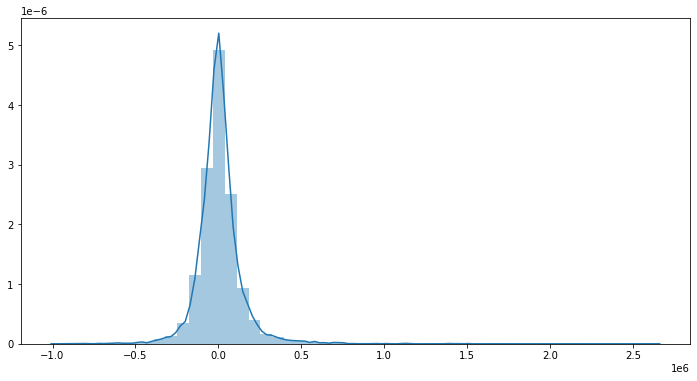

In [133]:
plt.figure(figsize=(12,6))
sns.distplot(errors);

In [135]:
pd.DataFrame(errors).describe()

,0
count,6.480000e+03
mean,5.993002e+03
std,1.385914e+05
min,-9.639002e+05
25%,-5.666830e+04
50%,-1.309578e+03
75%,5.462921e+04
max,2.616700e+06


In [164]:
pd.DataFrame(df_err.diff_abs).min()

diff_abs    11.40625
dtype: float64

In [165]:
df_err[df_err.diff_abs<12]

,real,pred,diff,diff_abs
4125,435000.0,435011.40625,-11.40625,11.40625


In [179]:
df[df.price==435000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,year,month,zip,age,basement,renov
379,435000.0,3,1.50,1300,3348,1.5,0,0,3,7,...,47.5920,-122.307,1590,2577,2015,4,1,114,0,1
565,435000.0,3,2.50,1840,5680,2.0,0,0,3,7,...,47.6969,-122.026,1600,4697,2014,7,1,10,0,0
671,435000.0,4,2.50,1700,6380,1.0,0,0,4,7,...,47.6988,-122.319,1380,6380,2014,9,1,78,1,0
749,435000.0,4,1.50,1510,6460,1.0,0,0,3,7,...,47.7121,-122.214,1450,6630,2014,9,1,48,1,0
908,435000.0,3,1.00,1400,4800,1.0,0,0,4,6,...,47.5499,-122.391,1470,6000,2014,8,1,101,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19902,435000.0,4,2.25,2140,6355,2.0,0,0,3,7,...,47.5367,-121.880,2480,5746,2014,5,1,16,0,0
20826,435000.0,3,2.25,1230,1238,2.0,0,0,3,8,...,47.6519,-122.384,1230,953,2014,6,1,9,1,0
21282,435000.0,4,2.50,2550,5200,2.0,0,0,3,7,...,47.4919,-122.153,2550,4660,2014,7,1,9,0,0
21322,435000.0,3,1.50,1180,1231,3.0,0,0,3,7,...,47.6845,-122.315,1280,3360,2015,4,1,10,0,0


In [163]:
pd.DataFrame(df_err.diff_abs).max()

diff_abs    2616700.5
dtype: float64

### Max and Min Error rows 

In [161]:
df.iloc[7245]

price            7.700000e+06
bedrooms         6.000000e+00
bathrooms        8.000000e+00
sqft_living      1.205000e+04
sqft_lot         2.760000e+04
floors           2.500000e+00
waterfront       0.000000e+00
view             3.000000e+00
condition        4.000000e+00
grade            1.300000e+01
sqft_above       8.570000e+03
lat              4.762980e+01
long            -1.223230e+02
sqft_living15    3.940000e+03
sqft_lot15       8.800000e+03
year             2.014000e+03
month            1.000000e+01
zip              1.000000e+00
age              1.080000e+02
basement         2.000000e+00
renov            1.000000e+00
Name: 7245, dtype: float64

In [168]:
single_house_max=df.drop('price', axis=1).iloc[7245]
single_house_max = scaler.transform(single_house_max.values.reshape(-1, 20))

In [170]:
model.predict(single_house_max)

array([[5083299.]], dtype=float32)